<a href="https://colab.research.google.com/github/ViniciusPrincipe/BitcoinPrediction-LSTM/blob/main/BtcLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
import sklearn.metrics as sk

In [2]:
df = pd.read_csv('/content/btc.csv')

dfLimpo = df['Close'].values
dfLimpo = dfLimpo[::-1]

In [3]:
len(dfLimpo)

1273

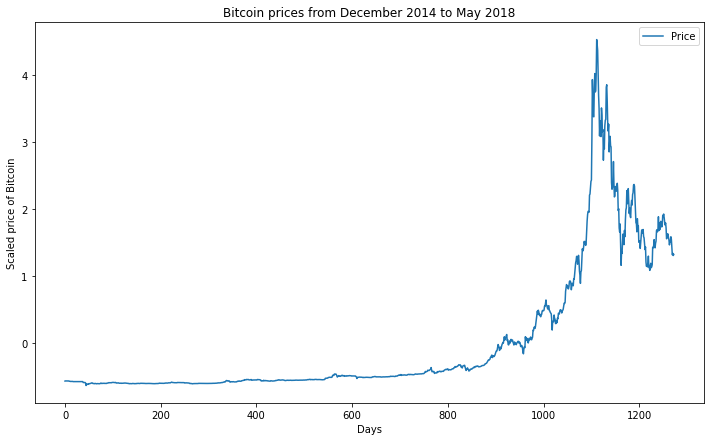

In [4]:
#data preprocessing(scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfLimpo.reshape(-1, 1))
#plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(scaled_data, label='Price')
plt.legend()
plt.show()

In [5]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [6]:
def model_evaluation(model,x_test):
  y_pred = model.predict(x_test)
  y_testNorm = scaler.fit_transform(y_test.reshape(-1, 1))
  y_predNorm = scaler.fit_transform(y_pred.reshape(-1, 1))

  mse = sk.mean_squared_error(y_testNorm, y_predNorm)
  rmse = np.sqrt(mse)
  mae = sk.mean_absolute_error(y_testNorm, y_predNorm)
  r2 = sk.r2_score(y_testNorm, y_predNorm)

  # Print the evaluation metrics
  print("Mean squared error: ", mse)
  print("Root mean squared error: ", rmse)
  print("Mean absolute error: ", mae)
  print("R2 score: ", r2)

  # Plot the predictions and actual values
  plt.plot(y_testNorm, label='Actual')
  plt.plot(y_predNorm, label='Predicted')
  plt.xlabel('Time')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [7]:
def plot_history(history):
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

In [8]:
#Criando datasets usando uma janela com 7 pontos
window_size = 7
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 7, 1)
y_train size: (886, 1)
X_val size: (127, 7, 1)
y_val size: (127, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)


Modelo 1: window_size = 7

In [9]:
#Configurações globais para todos os modelos
early_stop_val = EarlyStopping(monitor= 'val_loss',  patience= 4)
early_stop_train = EarlyStopping(monitor = 'loss',patience = 8)

In [10]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000005)
model.compile(loss='mean_squared_error', optimizer= optimizer)

Epoch 1/250
127/127 [==============================] - 6s 20ms/step - loss: 0.3874 - val_loss: 0.0940
Epoch 2/250
127/127 [==============================] - 2s 14ms/step - loss: 0.3659 - val_loss: 0.0926
Epoch 3/250
127/127 [==============================] - 2s 16ms/step - loss: 0.3453 - val_loss: 0.0914
Epoch 4/250
127/127 [==============================] - 2s 15ms/step - loss: 0.3256 - val_loss: 0.0902
Epoch 5/250
127/127 [==============================] - 1s 11ms/step - loss: 0.3066 - val_loss: 0.0891
Epoch 6/250
127/127 [==============================] - 1s 11ms/step - loss: 0.2883 - val_loss: 0.0881
Epoch 7/250
127/127 [==============================] - 1s 11ms/step - loss: 0.2705 - val_loss: 0.0871
Epoch 8/250
127/127 [==============================] - 2s 14ms/step - loss: 0.2532 - val_loss: 0.0862
Epoch 9/250
127/127 [==============================] - 2s 13ms/step - loss: 0.2365 - val_loss: 0.0854
Epoch 10/250
127/127 [==============================] - 2s 15ms/step - loss: 0.220

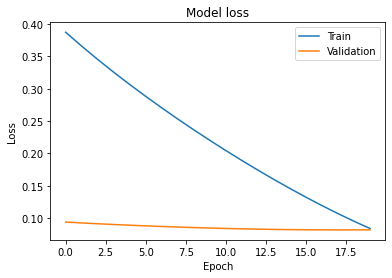

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.5279080614314758
Root mean squared error:  0.7265728190838657
Mean absolute error:  0.5805558445082122
R2 score:  0.47209193856852416


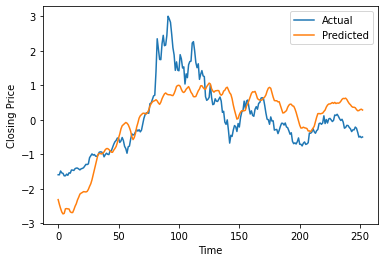

In [11]:
history = model.fit(x_train, y_train, epochs=250, batch_size=7,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_val])
plot_history(history)
model_evaluation(model,x_test)


Modelo 2: window_size = 7

In [12]:
model2 = Sequential()
model2.add(LSTM(150, input_shape=(window_size, 1)))
model2.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model2.compile(loss='mean_squared_error', optimizer= optimizer)

Epoch 1/250
127/127 [==============================] - 5s 17ms/step - loss: 0.3703 - val_loss: 0.0924
Epoch 2/250
127/127 [==============================] - 1s 12ms/step - loss: 0.3617 - val_loss: 0.0915
Epoch 3/250
127/127 [==============================] - 1s 10ms/step - loss: 0.3532 - val_loss: 0.0906
Epoch 4/250
127/127 [==============================] - 1s 10ms/step - loss: 0.3449 - val_loss: 0.0898
Epoch 5/250
127/127 [==============================] - 1s 10ms/step - loss: 0.3368 - val_loss: 0.0889
Epoch 6/250
127/127 [==============================] - 1s 10ms/step - loss: 0.3288 - val_loss: 0.0881
Epoch 7/250
127/127 [==============================] - 2s 16ms/step - loss: 0.3209 - val_loss: 0.0873
Epoch 8/250
127/127 [==============================] - 2s 13ms/step - loss: 0.3132 - val_loss: 0.0865
Epoch 9/250
127/127 [==============================] - 1s 11ms/step - loss: 0.3056 - val_loss: 0.0857
Epoch 10/250
127/127 [==============================] - 2s 12ms/step - loss: 0.298

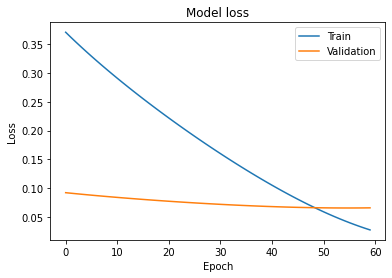

8/8 [==============================] - 1s 11ms/step
Mean squared error:  0.41635175549714126
Root mean squared error:  0.6452532491178493
Mean absolute error:  0.4938516373337788
R2 score:  0.5836482445028588


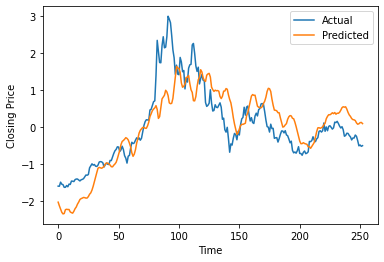

In [13]:
history = model2.fit(x_train, y_train, epochs=250, batch_size=7,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model2,x_test)

In [14]:
#Criando datasets usando uma janela com 5 pontos
window_size = 5
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 5, 1)
y_train size: (886, 1)
X_val size: (127, 5, 1)
y_val size: (127, 1)
X_test size: (255, 5, 1)
y_test size: (255, 1)


Modelo 3: window_size = 5

In [15]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(window_size, 1)))
model3.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000005)
model3.compile(loss='mean_squared_error', optimizer= optimizer)

Epoch 1/250
178/178 [==============================] - 4s 12ms/step - loss: 0.2959 - val_loss: 0.0741
Epoch 2/250
178/178 [==============================] - 1s 8ms/step - loss: 0.2795 - val_loss: 0.0734
Epoch 3/250
178/178 [==============================] - 1s 8ms/step - loss: 0.2638 - val_loss: 0.0728
Epoch 4/250
178/178 [==============================] - 1s 6ms/step - loss: 0.2487 - val_loss: 0.0722
Epoch 5/250
178/178 [==============================] - 2s 9ms/step - loss: 0.2340 - val_loss: 0.0718
Epoch 6/250
178/178 [==============================] - 2s 10ms/step - loss: 0.2197 - val_loss: 0.0713
Epoch 7/250
178/178 [==============================] - 1s 8ms/step - loss: 0.2058 - val_loss: 0.0710
Epoch 8/250
178/178 [==============================] - 1s 7ms/step - loss: 0.1922 - val_loss: 0.0708
Epoch 9/250
178/178 [==============================] - 1s 7ms/step - loss: 0.1788 - val_loss: 0.0706
Epoch 10/250
178/178 [==============================] - 1s 8ms/step - loss: 0.1657 - val_

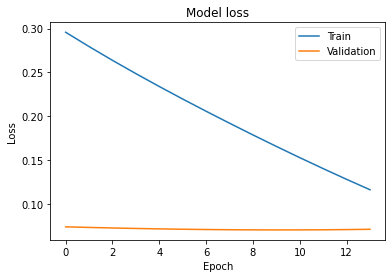

8/8 [==============================] - 1s 3ms/step
Mean squared error:  0.350091397779493
Root mean squared error:  0.5916852184899442
Mean absolute error:  0.4696348894422937
R2 score:  0.6499086022205071


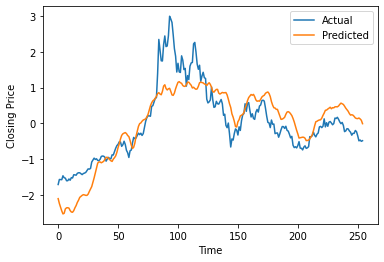

In [16]:
history = model3.fit(x_train, y_train, epochs=250, batch_size=5,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model3,x_test)

modelo 4: window_size = 5

In [17]:
model4 = Sequential()
model4.add(LSTM(150, input_shape=(window_size, 1)))
model4.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model4.compile(loss='mean_squared_error', optimizer= optimizer)

Epoch 1/250
222/222 [==============================] - 8s 16ms/step - loss: 0.2381 - val_loss: 0.0596
Epoch 2/250
222/222 [==============================] - 3s 14ms/step - loss: 0.2285 - val_loss: 0.0587
Epoch 3/250
222/222 [==============================] - 3s 14ms/step - loss: 0.2191 - val_loss: 0.0579
Epoch 4/250
222/222 [==============================] - 3s 13ms/step - loss: 0.2100 - val_loss: 0.0571
Epoch 5/250
222/222 [==============================] - 2s 10ms/step - loss: 0.2011 - val_loss: 0.0563
Epoch 6/250
222/222 [==============================] - 2s 10ms/step - loss: 0.1924 - val_loss: 0.0555
Epoch 7/250
222/222 [==============================] - 2s 10ms/step - loss: 0.1839 - val_loss: 0.0547
Epoch 8/250
222/222 [==============================] - 3s 12ms/step - loss: 0.1755 - val_loss: 0.0540
Epoch 9/250
222/222 [==============================] - 5s 21ms/step - loss: 0.1672 - val_loss: 0.0533
Epoch 10/250
222/222 [==============================] - 3s 14ms/step - loss: 0.159

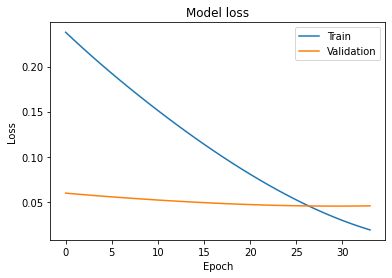

8/8 [==============================] - 1s 6ms/step
Mean squared error:  0.14360669477790797
Root mean squared error:  0.378954739748572
Mean absolute error:  0.29160966403220173
R2 score:  0.856393305222092


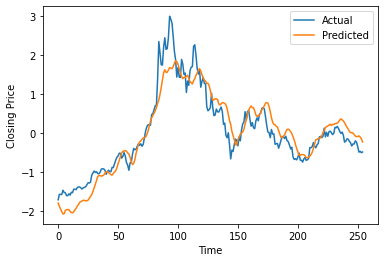

In [18]:
history = model4.fit(x_train, y_train, epochs=250, batch_size=4,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model4,x_test)